**Md. Shahriar Islam Shaikat - 23-93170-3**

**ASIF ARMAN HOSSAIN - 23-93134-3**

For mounting the drive to here


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing pandas library for reading excel data


In [2]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sn
from sklearn.metrics import classification_report

In [11]:
df = pd.read_excel('/content/drive/MyDrive/Symptom2Disease.xlsx')
test_df = pd.read_excel('/content/drive/MyDrive/test-Symptom2Disease.xlsx')

training = df["symptoms"].tolist()
labels = df["label"].tolist()

Test_Data = test_df["symptoms"].tolist()
Test_Label = test_df["label"].tolist()



In [12]:
corpus = {}
p_c = {}
all_corpus = ''
Size={}
resultSet = {'S.No': [],'Actual_class': [],'Predicted_class': []}

classes = set(labels)

for c in classes:
  #print(c)
  corpus[c]=''
  p_c[c] = len([1 for l in labels if l==c]) / len(labels)


for i in range(len(training)):
  for c in corpus:
    if labels[i] == c:
      corpus[c]= corpus[c] +' '+ training[i]

for key in corpus:
  corpus[key] = corpus[key].lower()
  Size[key]= len(corpus[key].split())
  all_corpus = all_corpus + corpus[key] + ' '


vocab = set(all_corpus.split())
Size['total'] = len(vocab)




for i in range(len(Test_Data)):
  words = Test_Data[i].lower().split()
  resultCounter = p_c.copy()

  for word in words:
    if word in vocab:
      for key in corpus:
        resultCounter[key] = resultCounter[key]*(corpus[key].count(word)+1)/(Size[key]+ Size['total'])

  max_key = max(resultCounter, key=lambda key: resultCounter[key])
  resultSet['S.No'].append(i+1)
  resultSet['Actual_class'].append(Test_Label[i])
  resultSet['Predicted_class'].append(max_key)


  #print("-------------------------------------------")
  #print(Test_Data[i])
  #print(f"Result : '{max_key}'")

In [13]:
rs = pd.DataFrame(resultSet)

In [14]:
#rs.to_excel('/content/drive/MyDrive/output-Symptom2Disease.xlsx', index=False)
#model_pred = pd.read_excel('/content/drive/MyDrive/output-Symptom2Disease.xlsx',index_col=[0])
model_pred = rs

In [15]:
confusion_M1 = pd.crosstab(model_pred.Predicted_class,model_pred.Actual_class)
confusion_M1

Actual_class,Acne,Arthritis,Bronchial Asthma,Cervical spondylosis,Chicken pox,Common Cold,Dengue,Dimorphic Hemorrhoids,Fungal infection,Hypertension,...,Pneumonia,Psoriasis,Typhoid,Varicose Veins,allergy,diabetes,drug reaction,gastroesophageal reflux disease,peptic ulcer disease,urinary tract infection
Predicted_class,,,,,,,,,,,,,,,,,,,,,
Acne,12,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Arthritis,0,12,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Bronchial Asthma,0,0,12,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
Cervical spondylosis,0,0,0,12,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Chicken pox,0,0,0,0,12,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Common Cold,0,1,0,1,0,12,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Dengue,0,0,0,1,0,0,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dimorphic Hemorrhoids,1,0,0,0,0,0,1,12,0,0,...,0,0,0,0,0,0,0,0,0,0
Fungal infection,0,0,0,0,0,0,1,0,12,1,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='Actual_class', ylabel='Predicted_class'>

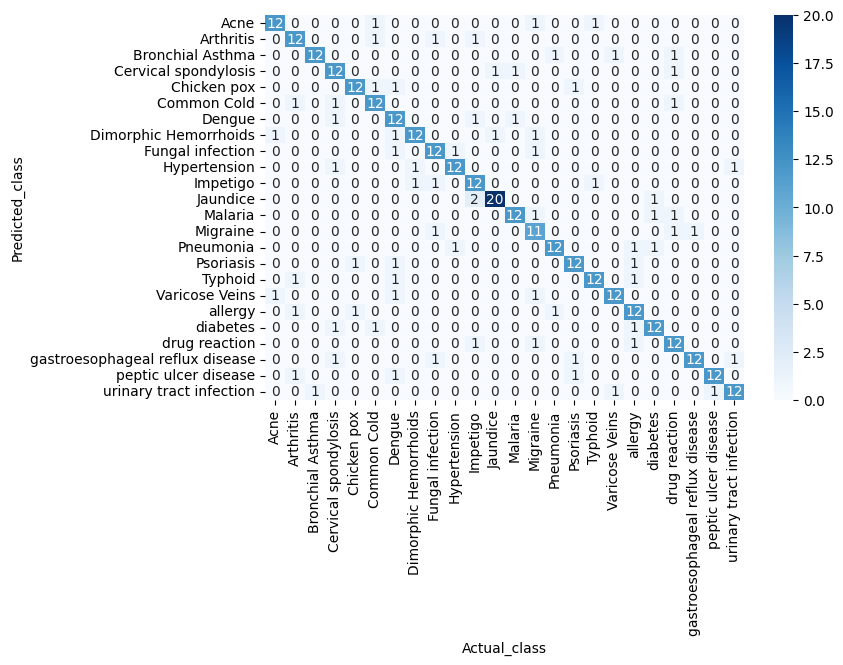

In [16]:
fig = plt.figure(figsize=(17,5))
ax1 = plt. subplot(121)
sn. heatmap (confusion_M1, annot=True, cmap='Blues')

In [17]:
np.diag(confusion_M1).sum()/confusion_M1.sum().sum()

0.7994579945799458

In [18]:
for i in range (confusion_M1.shape[0]):
  TP = confusion_M1.iloc[i,i]
  FP = confusion_M1.iloc[i, :].sum() - TP
  FN = confusion_M1.iloc[:,i].sum()- TP
  TN = confusion_M1.sum().sum() - TP - FP - FN
  Accuracy = (TP+TN) /confusion_M1.sum().sum()
  Precision = TP/(TP+FP)
  Recall = TP/(TP+FN)
  F1_Score = (2 * Precision *Recall)/ (Precision+Recall)
  print (f"{confusion_M1.index[i]}: {Accuracy} {Precision} {Recall} {F1_Score}")

Acne: 0.986449864498645 0.8 0.8571428571428571 0.8275862068965518
Arthritis: 0.981029810298103 0.8 0.75 0.7741935483870969
Bronchial Asthma: 0.989159891598916 0.8 0.9230769230769231 0.8571428571428571
Cervical spondylosis: 0.978319783197832 0.8 0.7058823529411765 0.7500000000000001
Chicken pox: 0.986449864498645 0.8 0.8571428571428571 0.8275862068965518
Common Cold: 0.981029810298103 0.8 0.75 0.7741935483870969
Dengue: 0.9728997289972899 0.8 0.631578947368421 0.7058823529411765
Dimorphic Hemorrhoids: 0.983739837398374 0.75 0.8571428571428571 0.7999999999999999
Fungal infection: 0.981029810298103 0.8 0.75 0.7741935483870969
Hypertension: 0.986449864498645 0.8 0.8571428571428571 0.8275862068965518
Impetigo: 0.978319783197832 0.8 0.7058823529411765 0.7500000000000001
Jaundice: 0.986449864498645 0.8695652173913043 0.9090909090909091 0.888888888888889
Malaria: 0.986449864498645 0.8 0.8571428571428571 0.8275862068965518
Migraine: 0.975609756097561 0.7857142857142857 0.6470588235294118 0.7096

In [19]:
pd.DataFrame(classification_report(model_pred.Actual_class,model_pred.Predicted_class,output_dict=True)).T

,precision,recall,f1-score,support
Acne,0.800000,0.857143,0.827586,14.000000
Arthritis,0.800000,0.750000,0.774194,16.000000
Bronchial Asthma,0.800000,0.923077,0.857143,13.000000
Cervical spondylosis,0.800000,0.705882,0.750000,17.000000
Chicken pox,0.800000,0.857143,0.827586,14.000000
Common Cold,0.800000,0.750000,0.774194,16.000000
Dengue,0.800000,0.631579,0.705882,19.000000
Dimorphic Hemorrhoids,0.750000,0.857143,0.800000,14.000000
Fungal infection,0.800000,0.750000,0.774194,16.000000
Hypertension,0.800000,0.857143,0.827586,14.000000
